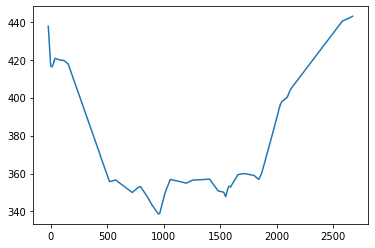

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from hydxscomp.crosssection import CrossSection
from hydxscomp.frict import TableFrict


frict = TableFrict([-np.inf, np.inf], [0.035, 0.035])
station, elevation = np.loadtxt(r'data/xs.csv', delimiter=',', skiprows=1, unpack=True)
_ = plt.plot(station, elevation)

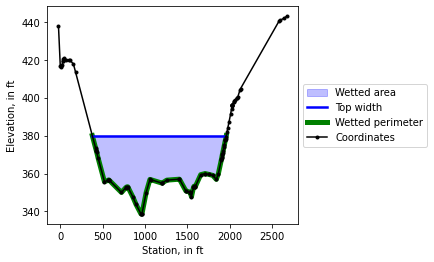

In [2]:
xs1 = CrossSection(station, elevation, frict)
_ = xs1.plot(380)

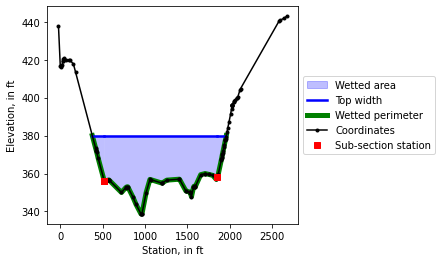

In [3]:
sect_stat = [520, 1850]
xs2 = CrossSection(station, elevation, frict, sect_stat)
_ = xs2.plot(380)

In [4]:
xs1.conveyance(380)

13474254.065053022

In [5]:
xs2.conveyance(380)

13870142.899827836

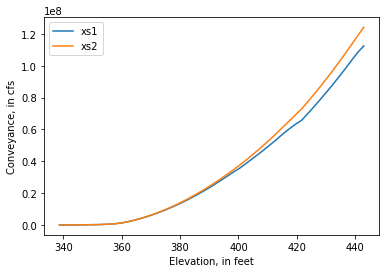

In [6]:
h = np.linspace(elevation.min() + 0.01, elevation.max())
k1 = xs1.conveyance(h)
k2 = xs2.conveyance(h)

plt.plot(h, k1, label='xs1')
plt.plot(h, k2, label='xs2')
plt.xlabel('Elevation, in feet')
plt.ylabel('Conveyance, in cfs')
plt.legend()

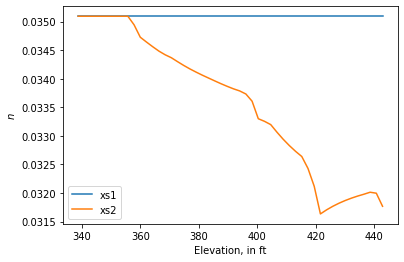

In [7]:
n1 = 1.49/k1*xs1.area(h)*xs1.hydraulic_radius(h)**(2/3)
n2 = 1.49/k2*xs2.area(h)*xs2.hydraulic_radius(h)**(2/3)

plt.plot(h, n1, label='xs1')
plt.plot(h, n2, label='xs2')
plt.xlabel('Elevation, in ft')
plt.ylabel('$n$')
plt.legend()